In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
%matplotlib inline

In [15]:
from google.colab import files
uploaded = files.upload()

Saving churn.csv to churn (1).csv


In [16]:
df = pd.read_csv('churn.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df.shape

(10000, 14)

In [18]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [19]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
#df['customerId']= df['customerId'].duplicated().sum()
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [22]:
# Drop irrelevant columns
df.drop(['RowNumber', 'HasCrCard'], axis=1, inplace=True)

In [23]:
# Rename churn flag
df.rename(columns={'Exited': 'Churn'}, inplace=True)

In [24]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


In [10]:
df.shape

(10000, 12)

**Univariate Analysis**

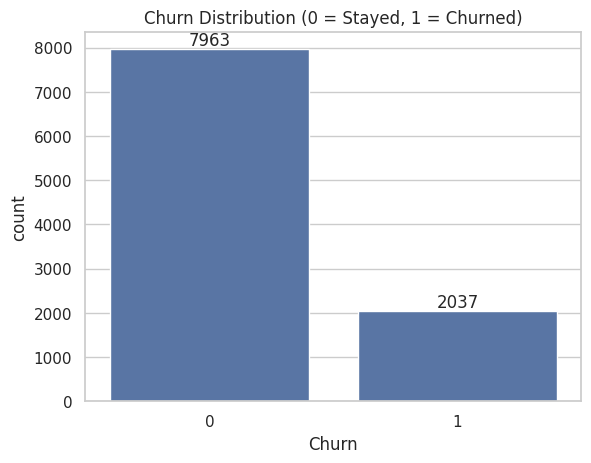

In [ ]:
lb=sns.countplot(x='Churn', data=df)
lb.bar_label(lb.containers[0])
plt.xlabel('Churn')
plt.title('Churn Distribution (0 = Stayed, 1 = Churned)')
plt.show()


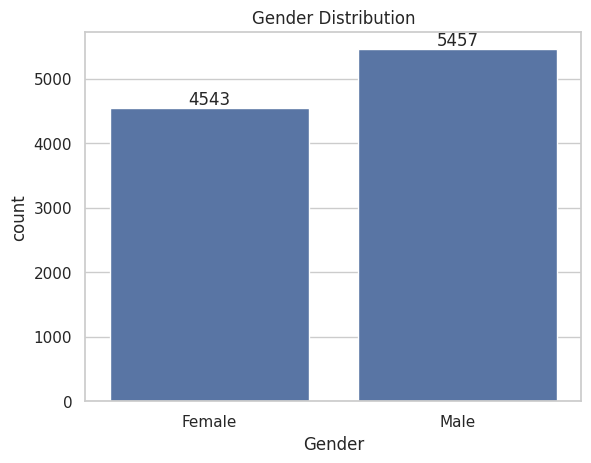

In [ ]:
lb=sns.countplot(x='Gender', data=df)
lb.bar_label(lb.containers[0])
plt.xlabel('Gender')
plt.title('Gender Distribution')
plt.show()

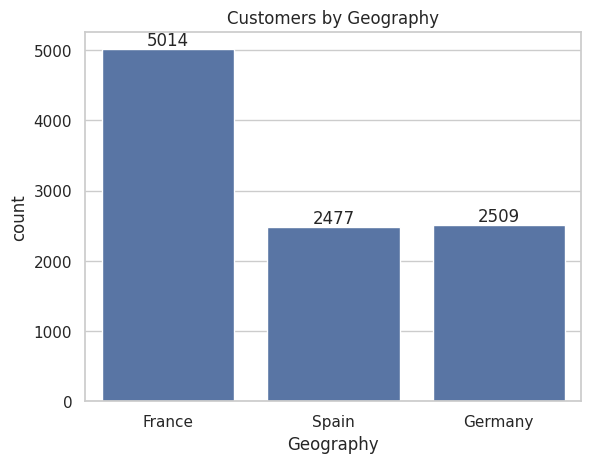

In [ ]:
lb=sns.countplot(x='Geography', data=df)
lb.bar_label(lb.containers[0])
plt.xlabel('Geography')
plt.title('Customers by Geography')
plt.show()

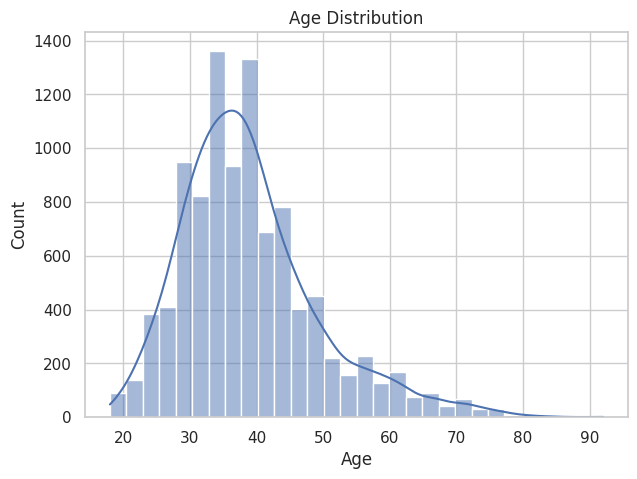

This histogram distribution appears to right skewed , with a peak around late 30s and earlt 40


In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()
print('This histogram distribution appears to right skewed , with a peak around late 30s and earlt 40')

 **Bivariate** **Analysis**

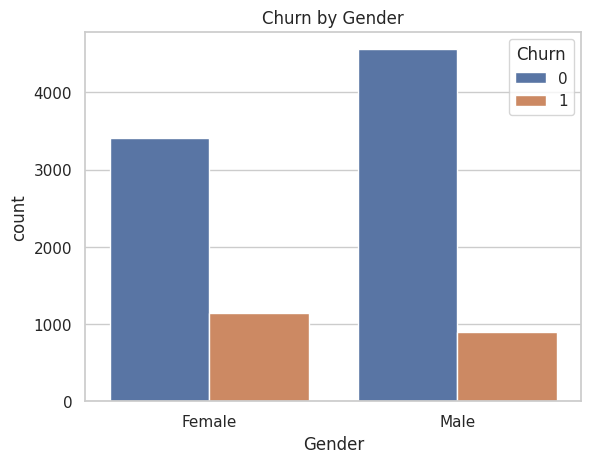

The bar plot compares the churn rate between male and female customers.it shows that female customers have a slightly higher churn rate than male customers. 


In [ ]:
sns.countplot(x='Gender', hue='Churn', data=df)
plt.title('Churn by Gender')
plt.show()
print('The bar plot compares the churn rate between male and female customers.it shows that female customers have a slightly higher churn rate than male customers. ')

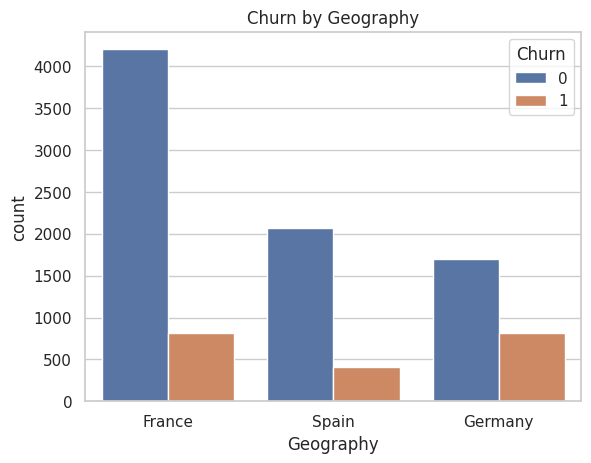

Germany appears to have a higher churn rate compared to France and Spain.


In [ ]:
sns.countplot(x='Geography', hue='Churn', data=df)
plt.title('Churn by Geography')
plt.show()
print('Germany appears to have a higher churn rate compared to France and Spain.')

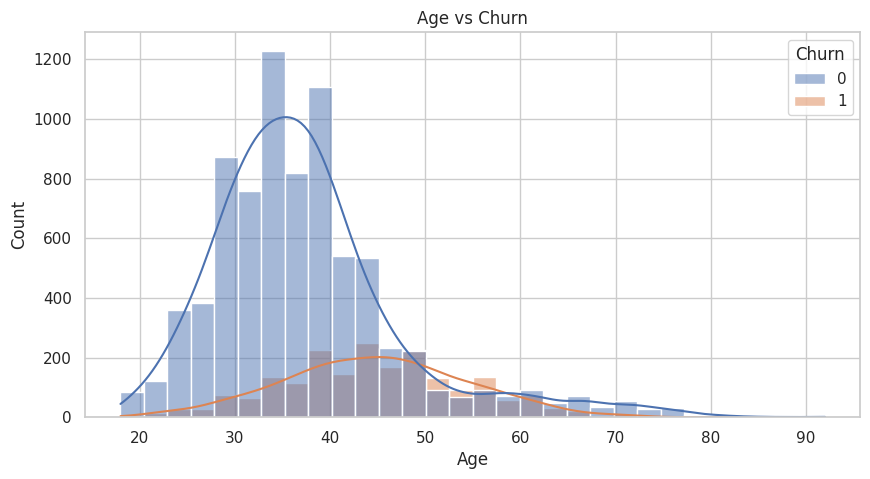

customers in the middle age range (around 40-60) have a higher tendency to churn.


In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Age', hue='Churn', bins=30, kde=True)
plt.title('Age vs Churn')
plt.show()
print('customers in the middle age range (around 40-60) have a higher tendency to churn.')

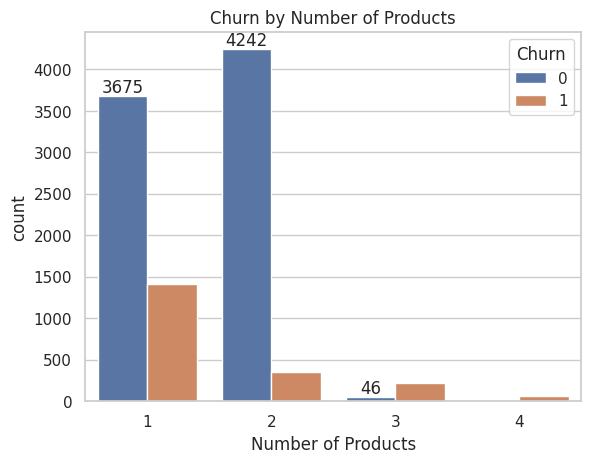

 Customers with 3 or 4 products have a much higher churn rate than those with 1 or 2 products.


In [ ]:
lb=sns.countplot(x='NumOfProducts', hue='Churn', data=df)
lb.bar_label(lb.containers[0])
plt.xlabel('Number of Products')
plt.title('Churn by Number of Products')
plt.show()
print(' Customers with 3 or 4 products have a much higher churn rate than those with 1 or 2 products.')

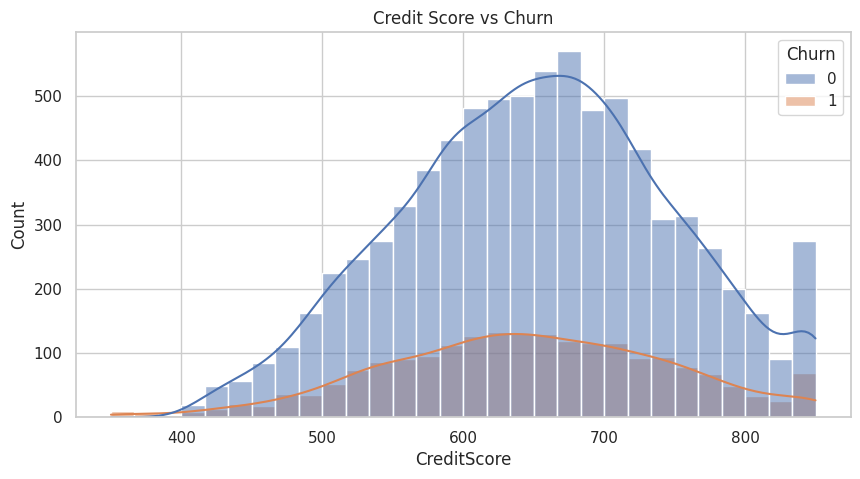

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='CreditScore', hue='Churn', bins=30, kde=True)
plt.title('Credit Score vs Churn')
plt.show()
#print('')

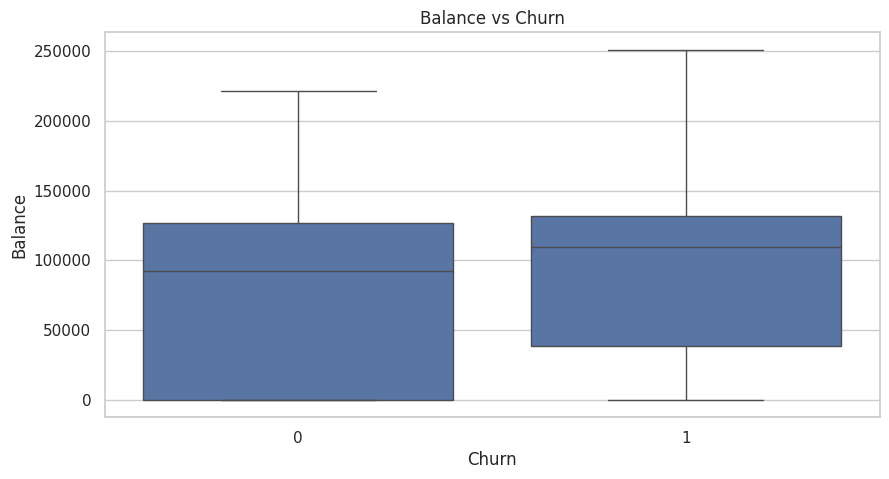

This boxplot compares the balance of churned and non-churned customers. Customers who churned tend to have higher balances than those who stayed


In [ ]:
plt.figure(figsize=(10,5))
lb=sns.boxplot(x='Churn', y='Balance', data=df)
lb.set_xlabel('Churn')
lb.set_ylabel('Balance')
plt.title('Balance vs Churn')
plt.show()
print('This boxplot compares the balance of churned and non-churned customers. Customers who churned tend to have higher balances than those who stayed')

/tmp/ipython-input-3624112284.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['AgeGroup','Gender'])['Churn'].mean().reset_index()


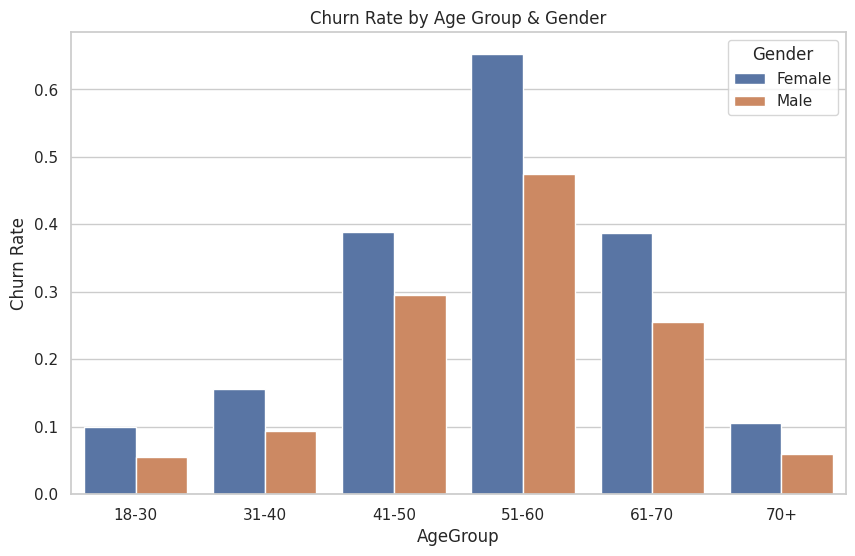

it shows that churn rate is higher in older age groups and that within most age groups, females have a higher churn rate than males.


In [ ]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[18,30,40,50,60,70,100],
                        labels=['18‑30','31‑40','41‑50','51‑60','61‑70','70+'])
grouped = df.groupby(['AgeGroup','Gender'])['Churn'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=grouped, x='AgeGroup', y='Churn', hue='Gender')
plt.title('Churn Rate by Age Group & Gender')
plt.ylabel('Churn Rate')
plt.show()
print('it shows that churn rate is higher in older age groups and that within most age groups, females have a higher churn rate than males.')


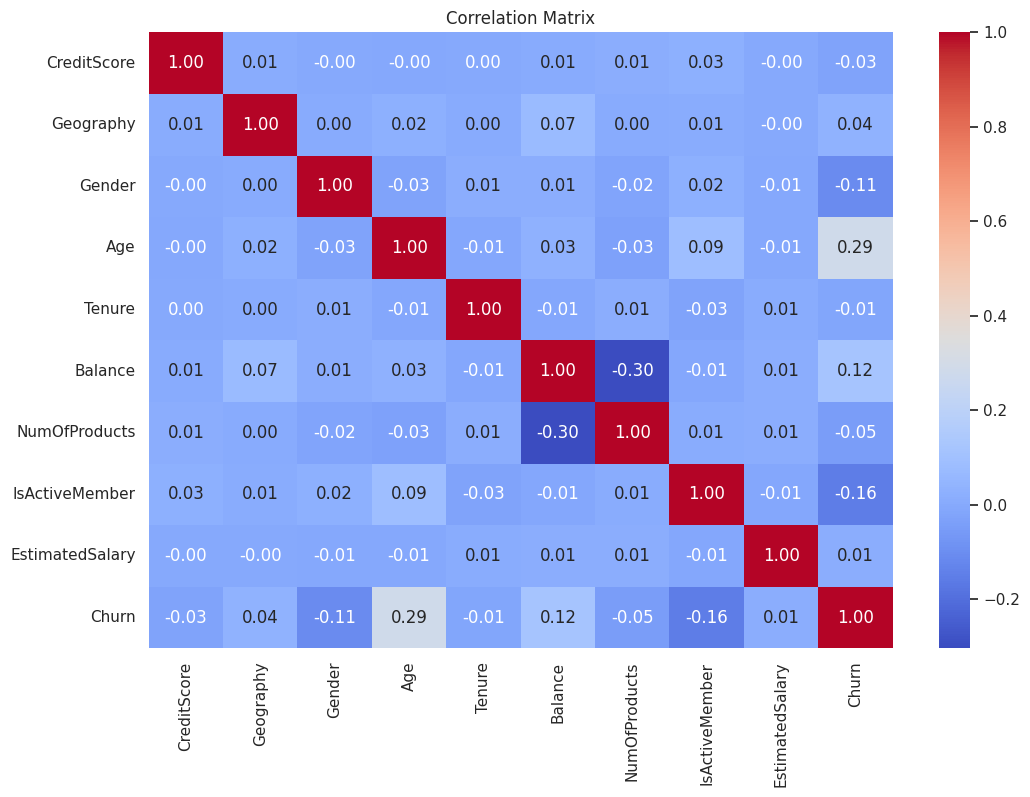

In [ ]:
df_corr = df.copy()
df_corr['Gender'] = df_corr['Gender'].map({'Female': 0, 'Male': 1})
df_corr['Geography'] = df_corr['Geography'].map({'France': 0, 'Germany': 1, 'Spain': 2})
df_corr = df_corr.drop('AgeGroup', axis=1)

plt.figure(figsize=(12,8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**SUMMARY**

Based on this visualaization, several factors are associated with customer churn in this dataset:

Geography: Customers in Germany have a considerably higher churn rate.
Age: Middle-aged customers (40-60) are more likely to churn.
Number of Products: Customers with 3 or more products have a significantly higher churn rate.
Gender: Female customers have a slightly higher churn rate.
Balance: Customers with higher balances tend to churn more often.
Other factors like Credit Score and having a credit card do not appear to have a strong impact on churn based on these visualizations.
